In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_path = 'mail_data.csv'
mail_data = pd.read_csv(file_path)
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
X = mail_data['Message']
y = mail_data['Category']
print(X,"\n",y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object 
 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object


In [7]:
# Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=3)

RANDOM FOREST

In [9]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# Predictions
rf_y_pred = rf_model.predict(X_test)

In [11]:
# Evaluate the Model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random forest classifier Model Accuracy:" ,rf_accuracy)
rf_report = classification_report(y_test, rf_y_pred)
print("Classification Report:\n", rf_report)

Random forest classifier Model Accuracy: 0.9757847533632287
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       960
        spam       1.00      0.83      0.90       155

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.97      1115



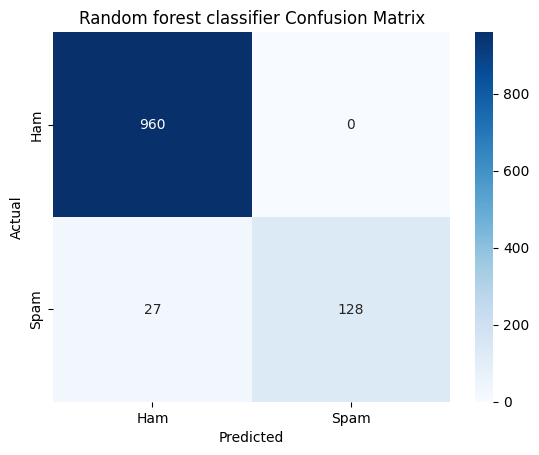

In [12]:
# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Random forest classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Multinomial Naive Bayes

In [13]:
# Create and train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Make predictions on the test data
nb_y_pred = nb_model.predict(X_test)

In [15]:
# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("Multinomial Naive Bayes Model Accuracy:", nb_accuracy)
nb_report = classification_report(y_test, nb_y_pred)
print("Classification Report:\n", nb_report)

Multinomial Naive Bayes Model Accuracy: 0.9802690582959641
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       960
        spam       1.00      0.86      0.92       155

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



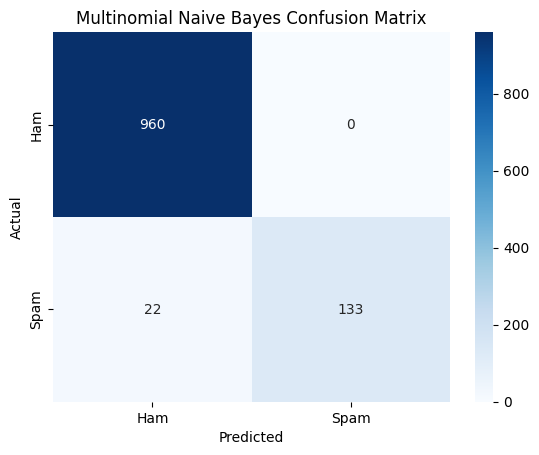

In [16]:
# Confusion Matrix
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression

In [17]:
#train logistic regression model
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Make predictions on the test data
lg_y_pred = lg_model.predict(X_test)

In [19]:
# Evaluate the model
lg_accuracy = accuracy_score(y_test, lg_y_pred)
print("Logistic Regression Model Accuracy:", lg_accuracy)
lg_report = classification_report(y_test, lg_y_pred)
print("Classification Report:\n", lg_report)

Logistic Regression Model Accuracy: 0.9587443946188341
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.98       960
        spam       1.00      0.70      0.83       155

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



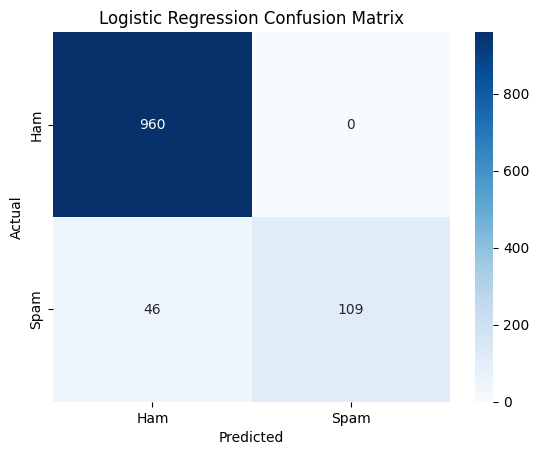

In [20]:
# Confusion Matrix
lg_conf_matrix = confusion_matrix(y_test, lg_y_pred)
sns.heatmap(lg_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Testing

In [21]:
# using spam mail
custom_email = "Congratulations! You've won a $1000 gift card. Click here to claim your prize."

# Transform the input using vectorizer
custom_email_processed = tfidf_vectorizer.transform([custom_email])

# Predict with each model
lg_prediction = lg_model.predict(custom_email_processed)
nb_prediction = nb_model.predict(custom_email_processed)
rf_prediction = rf_model.predict(custom_email_processed)

# Map predictions to labels
label_map = {"ham": "Ham", "spam": "Spam"}

print("Logistic Regression Prediction:", label_map[lg_prediction[0]])
print("Multinomial Naive Bayes Prediction:", label_map[nb_prediction[0]])
print("Random Forest Prediction:", label_map[rf_prediction[0]])


Logistic Regression Prediction: Spam
Multinomial Naive Bayes Prediction: Spam
Random Forest Prediction: Spam


In [22]:
# Using ham mail
custom_email = "Happy new year. Hope you are having a good semester"

# Transform the input using vectorizer
custom_email_processed = tfidf_vectorizer.transform([custom_email])

# Predict with each model
lg_prediction = lg_model.predict(custom_email_processed)
nb_prediction = nb_model.predict(custom_email_processed)
rf_prediction = rf_model.predict(custom_email_processed)

# Map predictions to labels
label_map = {"ham": "Ham", "spam": "Spam"}

print("Logistic Regression Prediction:", label_map[lg_prediction[0]])
print("Multinomial Naive Bayes Prediction:", label_map[nb_prediction[0]])
print("Random Forest Prediction:", label_map[rf_prediction[0]])


Logistic Regression Prediction: Ham
Multinomial Naive Bayes Prediction: Ham
Random Forest Prediction: Ham


Comparison between models

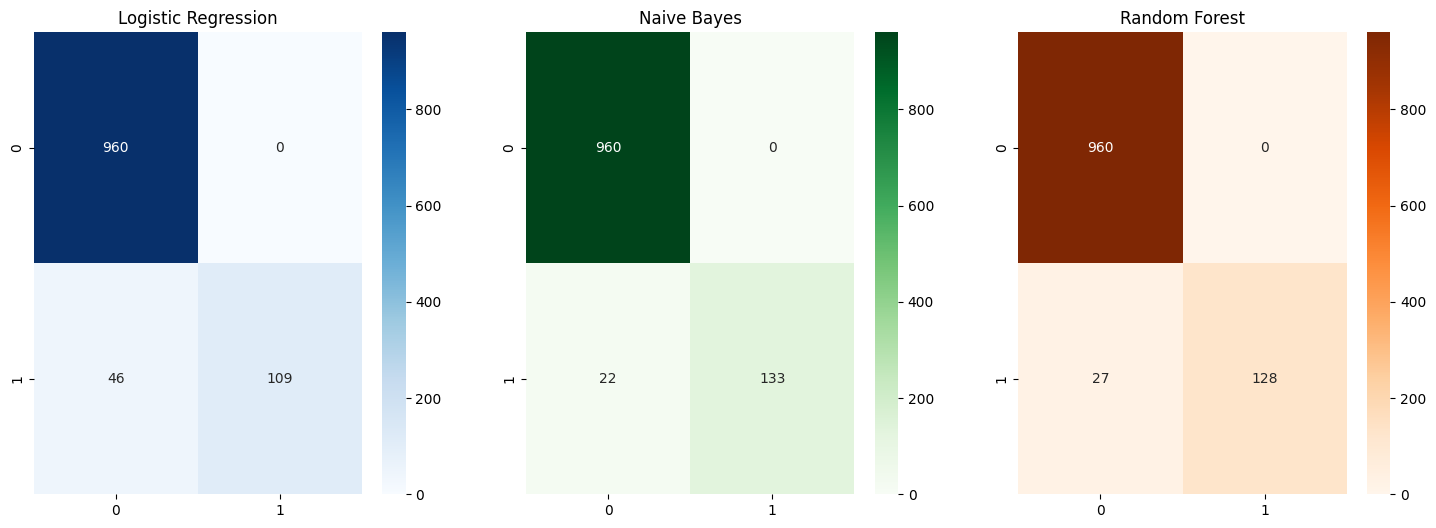

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(lg_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")

sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Naive Bayes")

sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("Random Forest")

plt.show()

In [24]:
metrics = {
    "Model": ["Logistic Regression", "Naive Bayes", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, lg_y_pred),
        accuracy_score(y_test, nb_y_pred),
        accuracy_score(y_test, rf_y_pred),
    ],
    "Precision": [
        precision_score(y_test, lg_y_pred, pos_label='spam'),
        precision_score(y_test, nb_y_pred, pos_label='spam'),
        precision_score(y_test, rf_y_pred, pos_label='spam'),
    ],
    "Recall": [
        recall_score(y_test, lg_y_pred, pos_label='spam'),
        recall_score(y_test, nb_y_pred, pos_label='spam'),
        recall_score(y_test, rf_y_pred, pos_label='spam'),
    ],
    "F1-Score": [
        f1_score(y_test, lg_y_pred, pos_label='spam'),
        f1_score(y_test, nb_y_pred, pos_label='spam'),
        f1_score(y_test, rf_y_pred, pos_label='spam'),
    ],
}

import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.958744        1.0  0.703226  0.825758
1          Naive Bayes  0.980269        1.0  0.858065  0.923611
2        Random Forest  0.975785        1.0  0.825806  0.904594


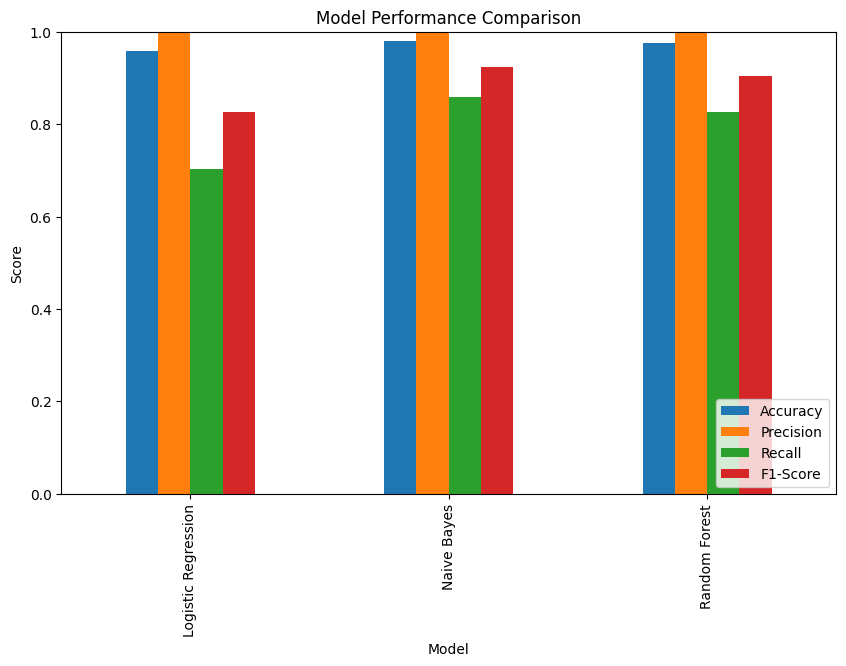

In [25]:
metrics_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1)  # Scale to match the metrics range
plt.legend(loc="lower right")
plt.show()


From this we can conclude that Multinomial Naive Bayes model is the best model for spam email detection among these three.

In [ ]:
import joblib
joblib.dump(nb_model, 'nb_model.pkl')  # Save the trained model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']